In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

PATH = 'data//'

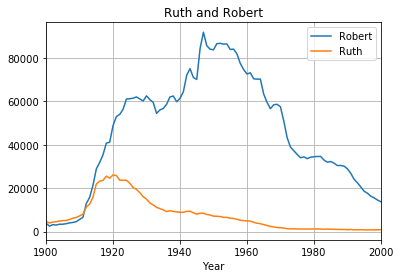

In [19]:
# Создаем словарь для хранения данных
names_by_year = {}
# Проходим по каждому году и читаем данные из файлов
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(
        PATH+'yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
# Соединяем все полученные данные в таблицу
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
# Объединяем данные по году и имени и суммируем данные
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
# На основе запроса выборки имен Ruth и Robert строим график
result = name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot(title='Ruth and Robert', grid=True)
# Переименовываем легенду
result.legend(['Robert', 'Ruth'])

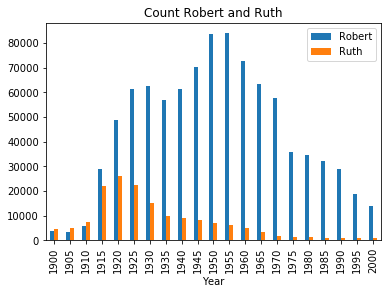

In [32]:
# Создаем словарь для хранения данных
names_by_year = {}
# Проходим по каждому пятому году и читаем данные о именах Robert и Ruth из файлов
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(
        PATH+'yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    ).query('Name == ["Ruth", "Robert"]').groupby('Name').sum()
# Соединяем все полученные данные в таблицу
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
# Выводим имена в шапку таблицы
names_all = names_all.unstack('Pos')
# Создаем объект графика
result = names_all.plot.bar(title='Count Robert and Ruth')
# Меняем название легенды
result.legend(['Robert', 'Ruth'])

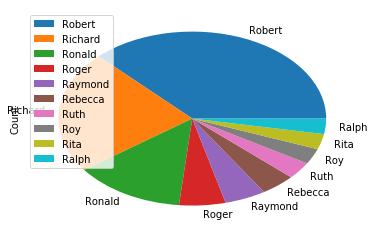

In [38]:
# Читаем данные за 1950 год
names_1950 = pd.read_csv(PATH+'yob1950.txt',names=['Name','Gender','Count'])
# Находим имена, начинающиеся с R
result = names_1950.query('"S">Name>"R"')
# Сортируем имена по их количеству и оставляем топ-10
result = result.sort_values(by='Count', ascending=False).head(10)
result = result.set_index('Name')
# Создаем круговую диаграмму
ax = result.plot.pie('Count')

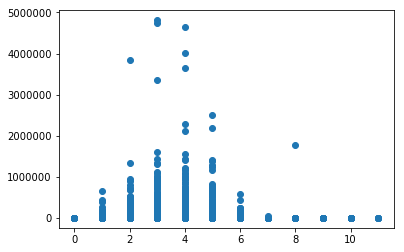

In [49]:
# Функция для подсчета согласных
def count_cons(name):
    CONS="qwrtpsdfghjklzxcvbnm"
    return sum(1 for t in name.lower() if t in CONS)
# Создаем словарь для хранения данных
names_by_year = {}
# Проходим по каждому году и читаем данные из файлов
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(
        PATH+'yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
# Сохраняем данные в DataFrame
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
# Группируем по имени и суммируем данные
name_dynamics = names_all.groupby(['Name']).sum()
# Добавляем колонку с количеством согласных
name_dynamics['Cons'] = 0
# Для каждого имени подсчитываем количество согласных
for name in name_dynamics['Count'].index:
    cons = count_cons(name)
    # Сохраняем полученные данные в ячейку
    name_dynamics.set_value(name, 'Cons', cons)
# Выводим точечный график соотношения Количество согласных : Количество людей с таким именем
plt.scatter(x=name_dynamics['Cons'], y=name_dynamics['Count'])